In [1]:
import sys
sys.path.insert(0, '..')
from mlconfound.stats import confound_test
from mlconfound.simulate import simulate
from mlconfound.plot import plot_null_dist, plot_graph

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Simulate some data for the null and alternative hypotheses

In [2]:
#                           true signal       confounder
H0_y, H0_yhat, H0_c = simulate(0.6,              0.3,     # y
                               0.0,              0.9,     # c
                               0.4,              0.2,     # yhat
                               n=500,                     # simulated sample size
                               random_state=42
                               )

#                           true signal       confounder
H1_y, H1_yhat, H1_c = simulate(0.6,              0.3,     # y
                               0.0,              0.9,     # c
                               0.3,              0.2,     # yhat
                               n=500,                     # simulated sample size
                               random_state=42
                              )

# Do the tests for H0 simulation

In [3]:
ret=confound_test(H0_y, H0_yhat, H0_c, num_perms=1000, return_null_dist=True, 
                  random_state=42)
#print results
pd.DataFrame({
    'p' : [ret.p],
    'ci lower' : [ret.p_ci[0]],
    'ci upper' : [ret.p_ci[1]],
    'R2(y,c)' : [ret.r2_y_c],
    'R2(y^,c)' : [ret.r2_yhat_c],
    'R2(y,y^)' : [ret.r2_y_yhat],
})


Permuting: 100%|██████████| 1000/1000 [00:08<00:00, 112.40it/s]


,p,ci lower,ci upper,"R2(y,c)","R2(y^,c)","R2(y,y^)"
0,0.404,0.373408,0.435159,0.206002,0.119126,0.548012


## Use the built-in plot functions:

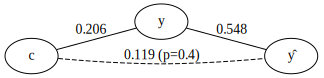

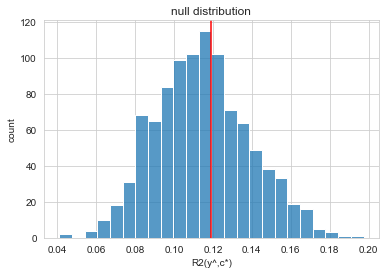

In [4]:
plot_null_dist(ret)
plot_graph(ret)

# Do the tests for H1 simulation

In [5]:
ret=confound_test(H1_y, H1_yhat, H1_c, num_perms=1000, return_null_dist=True, 
                  random_state=42, n_jobs=-1)

#print results
pd.DataFrame({
    'p' : [ret.p],
    'ci lower' : [ret.p_ci[0]],
    'ci upper' : [ret.p_ci[1]],
    'R2(y,c)' : [ret.r2_y_c],
    'R2(y^,c)' : [ret.r2_yhat_c],
    'R2(y,y^)' : [ret.r2_y_yhat],
})

Permuting: 100%|██████████| 1000/1000 [00:04<00:00, 203.55it/s]


,p,ci lower,ci upper,"R2(y,c)","R2(y^,c)","R2(y,y^)"
0,0.03,0.02033,0.042551,0.206002,0.113552,0.349972


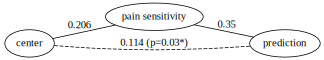

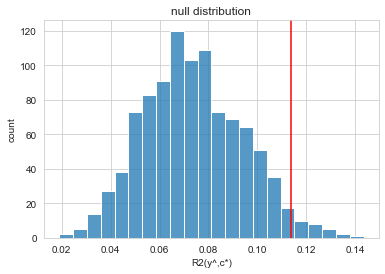

In [6]:
plot_null_dist(ret)
plot_graph(ret, y_name='pain sensitivity', yhat_name='prediction', c_name='center', outfile_base='example')